In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import datetime

%matplotlib inline
sns.set_style('dark')
sns.set(font_scale=1.2)

import warnings
warnings.filterwarnings('ignore')

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)

np.random.seed(0)
np.set_printoptions(suppress=True)

In [2]:
df = pd.read_csv("final.csv")

In [3]:
df

,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,Complaint Type
0,NaN,NaN,NaN,5.0,6.5,1,15000.0,200.00,1.0,NaN,NaN,NaN,6.02,NaN,0
1,752.0,16.00,0.05,5.0,6.5,4,13770.0,100.00,2.0,1.0,272.0,NaN,6.02,NaN,0
2,39375.0,200.00,1.13,5.0,6.5,10,35000.0,200.00,1.0,2.0,NaN,NaN,6.02,NaN,0
3,12500.0,85.00,5.00,5.0,6.5,17,2500.0,100.00,1.0,5.0,NaN,12500.0,6.02,NaN,0
4,8595.0,70.00,4.58,5.0,6.5,18,1875.0,75.00,1.0,5.0,NaN,6876.0,6.02,1719.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86586,1044.0,29.00,0.55,NaN,2.0,877,1900.0,76.00,1.0,2.0,NaN,1044.0,0.90,NaN,0
86587,237021.0,35.00,0.13,NaN,2.0,1,1845000.0,2000.00,20.0,12.0,NaN,NaN,0.90,NaN,0
86588,83366.0,121.75,0.32,NaN,2.0,10,257775.0,235.25,2.0,3.0,NaN,NaN,0.90,NaN,0
86589,NaN,NaN,NaN,NaN,2.0,43,14749.0,439.17,NaN,NaN,NaN,NaN,0.90,NaN,0


### Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86591 entries, 0 to 86590
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   BldgArea        83096 non-null  float64
 1   BldgDepth       82832 non-null  float64
 2   BuiltFAR        83015 non-null  float64
 3   CommFAR         5391 non-null   float64
 4   FacilFAR        85820 non-null  float64
 5   Lot             86591 non-null  int64  
 6   LotArea         86502 non-null  float64
 7   LotDepth        86465 non-null  float64
 8   NumBldgs        83466 non-null  float64
 9   NumFloors       82978 non-null  float64
 10  OfficeArea      2515 non-null   float64
 11  ResArea         75251 non-null  float64
 12  ResidFAR        82915 non-null  float64
 13  RetailArea      5877 non-null   float64
 14  Complaint Type  86591 non-null  int64  
dtypes: float64(13), int64(2)
memory usage: 9.9 MB


In [5]:
df.describe()

,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,Complaint Type
count,8.309600e+04,82832.000000,83015.000000,5391.000000,85820.000000,86591.000000,8.650200e+04,86465.000000,83466.000000,82978.000000,2.515000e+03,7.525100e+04,82915.000000,5877.000000,86591.000000
mean,8.691853e+03,52.118211,1.193003,1.979651,2.896301,105.260893,9.489138e+03,105.125877,1.270757,2.452484,1.799913e+04,6.778855e+03,1.764983,5341.564574,0.116848
std,6.761451e+04,29.041986,1.832941,1.178767,1.581351,426.684680,2.994019e+05,63.202144,1.968962,1.384847,6.928460e+04,6.165444e+04,1.282804,18495.633103,0.321241
min,1.000000e+00,2.000000,0.010000,0.500000,1.000000,1.000000,1.000000e+00,0.220000,1.000000,0.500000,5.000000e+01,2.000000e+02,0.500000,100.000000,0.000000
25%,1.728000e+03,36.000000,0.620000,1.000000,2.000000,20.000000,2.200000e+03,95.000000,1.000000,2.000000,1.125000e+03,1.399000e+03,0.900000,1217.000000,0.000000
50%,2.340000e+03,46.000000,0.910000,2.000000,2.000000,41.000000,2.513000e+03,100.000000,1.000000,2.000000,2.637000e+03,2.000000e+03,1.250000,2460.000000,0.000000
75%,3.381000e+03,57.000000,1.300000,2.000000,4.800000,72.000000,4.200000e+03,102.100000,1.000000,3.000000,8.754500e+03,2.816000e+03,2.430000,5000.000000,0.000000
max,1.354011e+07,1300.000000,259.800000,9.000000,10.000000,7505.000000,7.425000e+07,8000.000000,251.000000,44.000000,1.311800e+06,1.321140e+07,10.000000,598908.000000,1.000000


In [6]:
df.columns

Index(['BldgArea', 'BldgDepth', 'BuiltFAR', 'CommFAR', 'FacilFAR', 'Lot',
       'LotArea', 'LotDepth', 'NumBldgs', 'NumFloors', 'OfficeArea', 'ResArea',
       'ResidFAR', 'RetailArea', 'Complaint Type'],
      dtype='object')

### Fraction

In [13]:
df1 = df.sample(frac=0.2, random_state=0)

In [14]:
df1.shape

(17318, 15)

In [15]:
df1["Complaint Type"].value_counts()

0    15241
1     2077
Name: Complaint Type, dtype: int64

In [17]:
df1.shape

(17318, 15)

In [18]:
df1

,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,Complaint Type
15985,43000.0,87.0,2.46,NaN,4.8,17,17500.0,100.00,1.0,6.0,NaN,43000.0,3.44,NaN,0
78918,1260.0,40.0,0.53,NaN,1.0,24,2395.0,98.42,1.0,1.0,NaN,720.0,0.60,NaN,0
69038,2862.0,59.0,1.24,NaN,2.0,24,2317.0,87.42,1.0,2.0,NaN,1908.0,0.90,NaN,1
39005,2312.0,52.0,0.92,NaN,2.0,19,2500.0,100.00,1.0,2.0,NaN,2312.0,1.25,NaN,0
57007,2200.0,55.0,1.22,NaN,2.0,28,1800.0,90.00,1.0,2.0,NaN,2200.0,0.90,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52025,1296.0,36.0,0.62,NaN,2.0,52,2100.0,100.00,1.0,2.0,NaN,1296.0,0.90,NaN,0
81394,1974.0,47.0,0.70,NaN,1.0,1,2835.0,90.00,1.0,2.0,NaN,1974.0,0.60,NaN,0
32393,2800.0,50.0,1.40,NaN,2.0,67,2000.0,100.00,1.0,3.0,NaN,2800.0,1.25,NaN,0
57180,2120.0,37.0,1.07,NaN,2.0,14,1980.0,99.00,1.0,3.0,NaN,2120.0,0.90,NaN,0


In [19]:
X = df1.iloc[:,0:14]
y = df1.iloc[:,14]

In [20]:
X.values, y.values

(array([[43000.  ,    87.  ,     2.46, ..., 43000.  ,     3.44,      nan],
        [ 1260.  ,    40.  ,     0.53, ...,   720.  ,     0.6 ,      nan],
        [ 2862.  ,    59.  ,     1.24, ...,  1908.  ,     0.9 ,      nan],
        ...,
        [ 2800.  ,    50.  ,     1.4 , ...,  2800.  ,     1.25,      nan],
        [ 2120.  ,    37.  ,     1.07, ...,  2120.  ,     0.9 ,      nan],
        [ 1950.  ,    47.  ,     0.78, ...,  1950.  ,     3.44,      nan]]),
 array([0, 0, 1, ..., 0, 0, 0], dtype=int64))

### Treat Imbalance Data

In [21]:
ros = RandomUnderSampler(sampling_strategy='all',random_state=0)

In [22]:
new_X, new_y = ros.fit_resample(X, y)

In [23]:
new_X

,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea
0,1998.0,37.0,1.11,NaN,1.0,42,1800.0,100.00,1.0,3.00,NaN,1998.0,0.60,NaN
1,3252.0,55.0,1.63,NaN,4.8,20,2000.0,100.00,1.0,2.00,NaN,2168.0,3.44,NaN
2,3294.0,50.0,1.28,NaN,2.0,27,2575.0,103.00,1.0,2.00,NaN,2196.0,1.25,NaN
3,5005.0,55.0,0.99,2.0,4.0,51,5041.0,91.65,1.0,1.00,NaN,NaN,4.00,NaN
4,NaN,NaN,NaN,NaN,6.5,82,2500.0,100.00,NaN,NaN,NaN,NaN,6.02,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4149,2228.0,26.0,0.45,NaN,2.0,13,5000.0,100.00,2.0,1.67,NaN,1318.0,0.90,NaN
4150,1890.0,33.0,1.05,NaN,2.0,84,1800.0,100.00,1.0,2.00,NaN,1188.0,0.90,NaN
4151,4635.0,51.5,1.31,NaN,2.0,125,3549.0,85.00,1.0,3.00,NaN,4635.0,0.90,NaN
4152,4000.0,80.0,0.80,1.0,2.4,57,5000.0,100.00,1.0,1.00,NaN,NaN,NaN,NaN


In [24]:
new_y

0       0
1       0
2       0
3       0
4       0
       ..
4149    1
4150    1
4151    1
4152    1
4153    1
Name: Complaint Type, Length: 4154, dtype: int64

In [25]:
new_X.shape, new_y.shape

((4154, 14), (4154,))

In [26]:
df2 = pd.concat([new_X,new_y],axis=1)

In [27]:
df2

,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,Complaint Type
0,1998.0,37.0,1.11,NaN,1.0,42,1800.0,100.00,1.0,3.00,NaN,1998.0,0.60,NaN,0
1,3252.0,55.0,1.63,NaN,4.8,20,2000.0,100.00,1.0,2.00,NaN,2168.0,3.44,NaN,0
2,3294.0,50.0,1.28,NaN,2.0,27,2575.0,103.00,1.0,2.00,NaN,2196.0,1.25,NaN,0
3,5005.0,55.0,0.99,2.0,4.0,51,5041.0,91.65,1.0,1.00,NaN,NaN,4.00,NaN,0
4,NaN,NaN,NaN,NaN,6.5,82,2500.0,100.00,NaN,NaN,NaN,NaN,6.02,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4149,2228.0,26.0,0.45,NaN,2.0,13,5000.0,100.00,2.0,1.67,NaN,1318.0,0.90,NaN,1
4150,1890.0,33.0,1.05,NaN,2.0,84,1800.0,100.00,1.0,2.00,NaN,1188.0,0.90,NaN,1
4151,4635.0,51.5,1.31,NaN,2.0,125,3549.0,85.00,1.0,3.00,NaN,4635.0,0.90,NaN,1
4152,4000.0,80.0,0.80,1.0,2.4,57,5000.0,100.00,1.0,1.00,NaN,NaN,NaN,NaN,1


In [28]:
df2["Complaint Type"].value_counts()

1    2077
0    2077
Name: Complaint Type, dtype: int64

In [29]:
#df2.to_csv("nyc311balanced.csv",index=False)

### Data Visualization

### Univariate Data Exploration

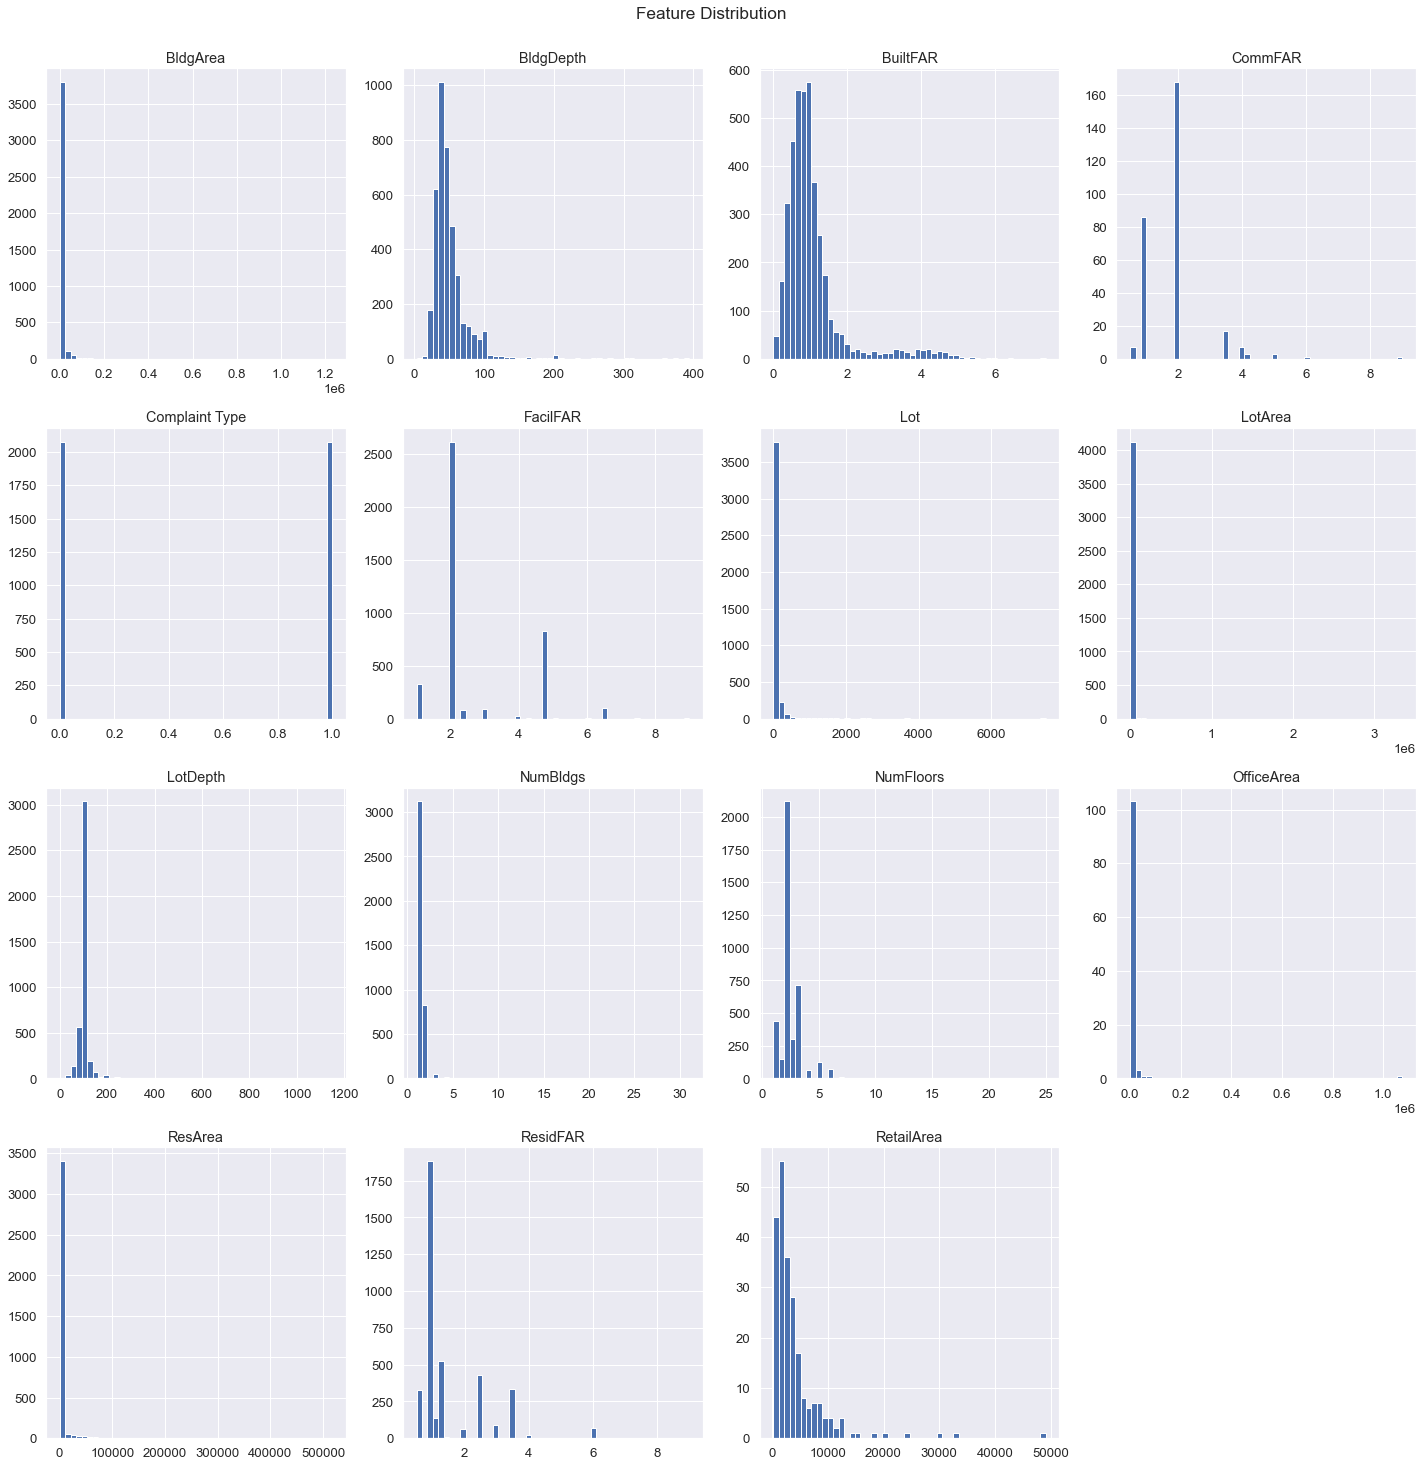

In [30]:
df2.hist(bins=50, figsize=(20,20))

plt.suptitle('Feature Distribution', x=0.5, y=1.02, ha='center', fontsize='large')

plt.tight_layout()

plt.show();

<Figure size 1440x1440 with 0 Axes>

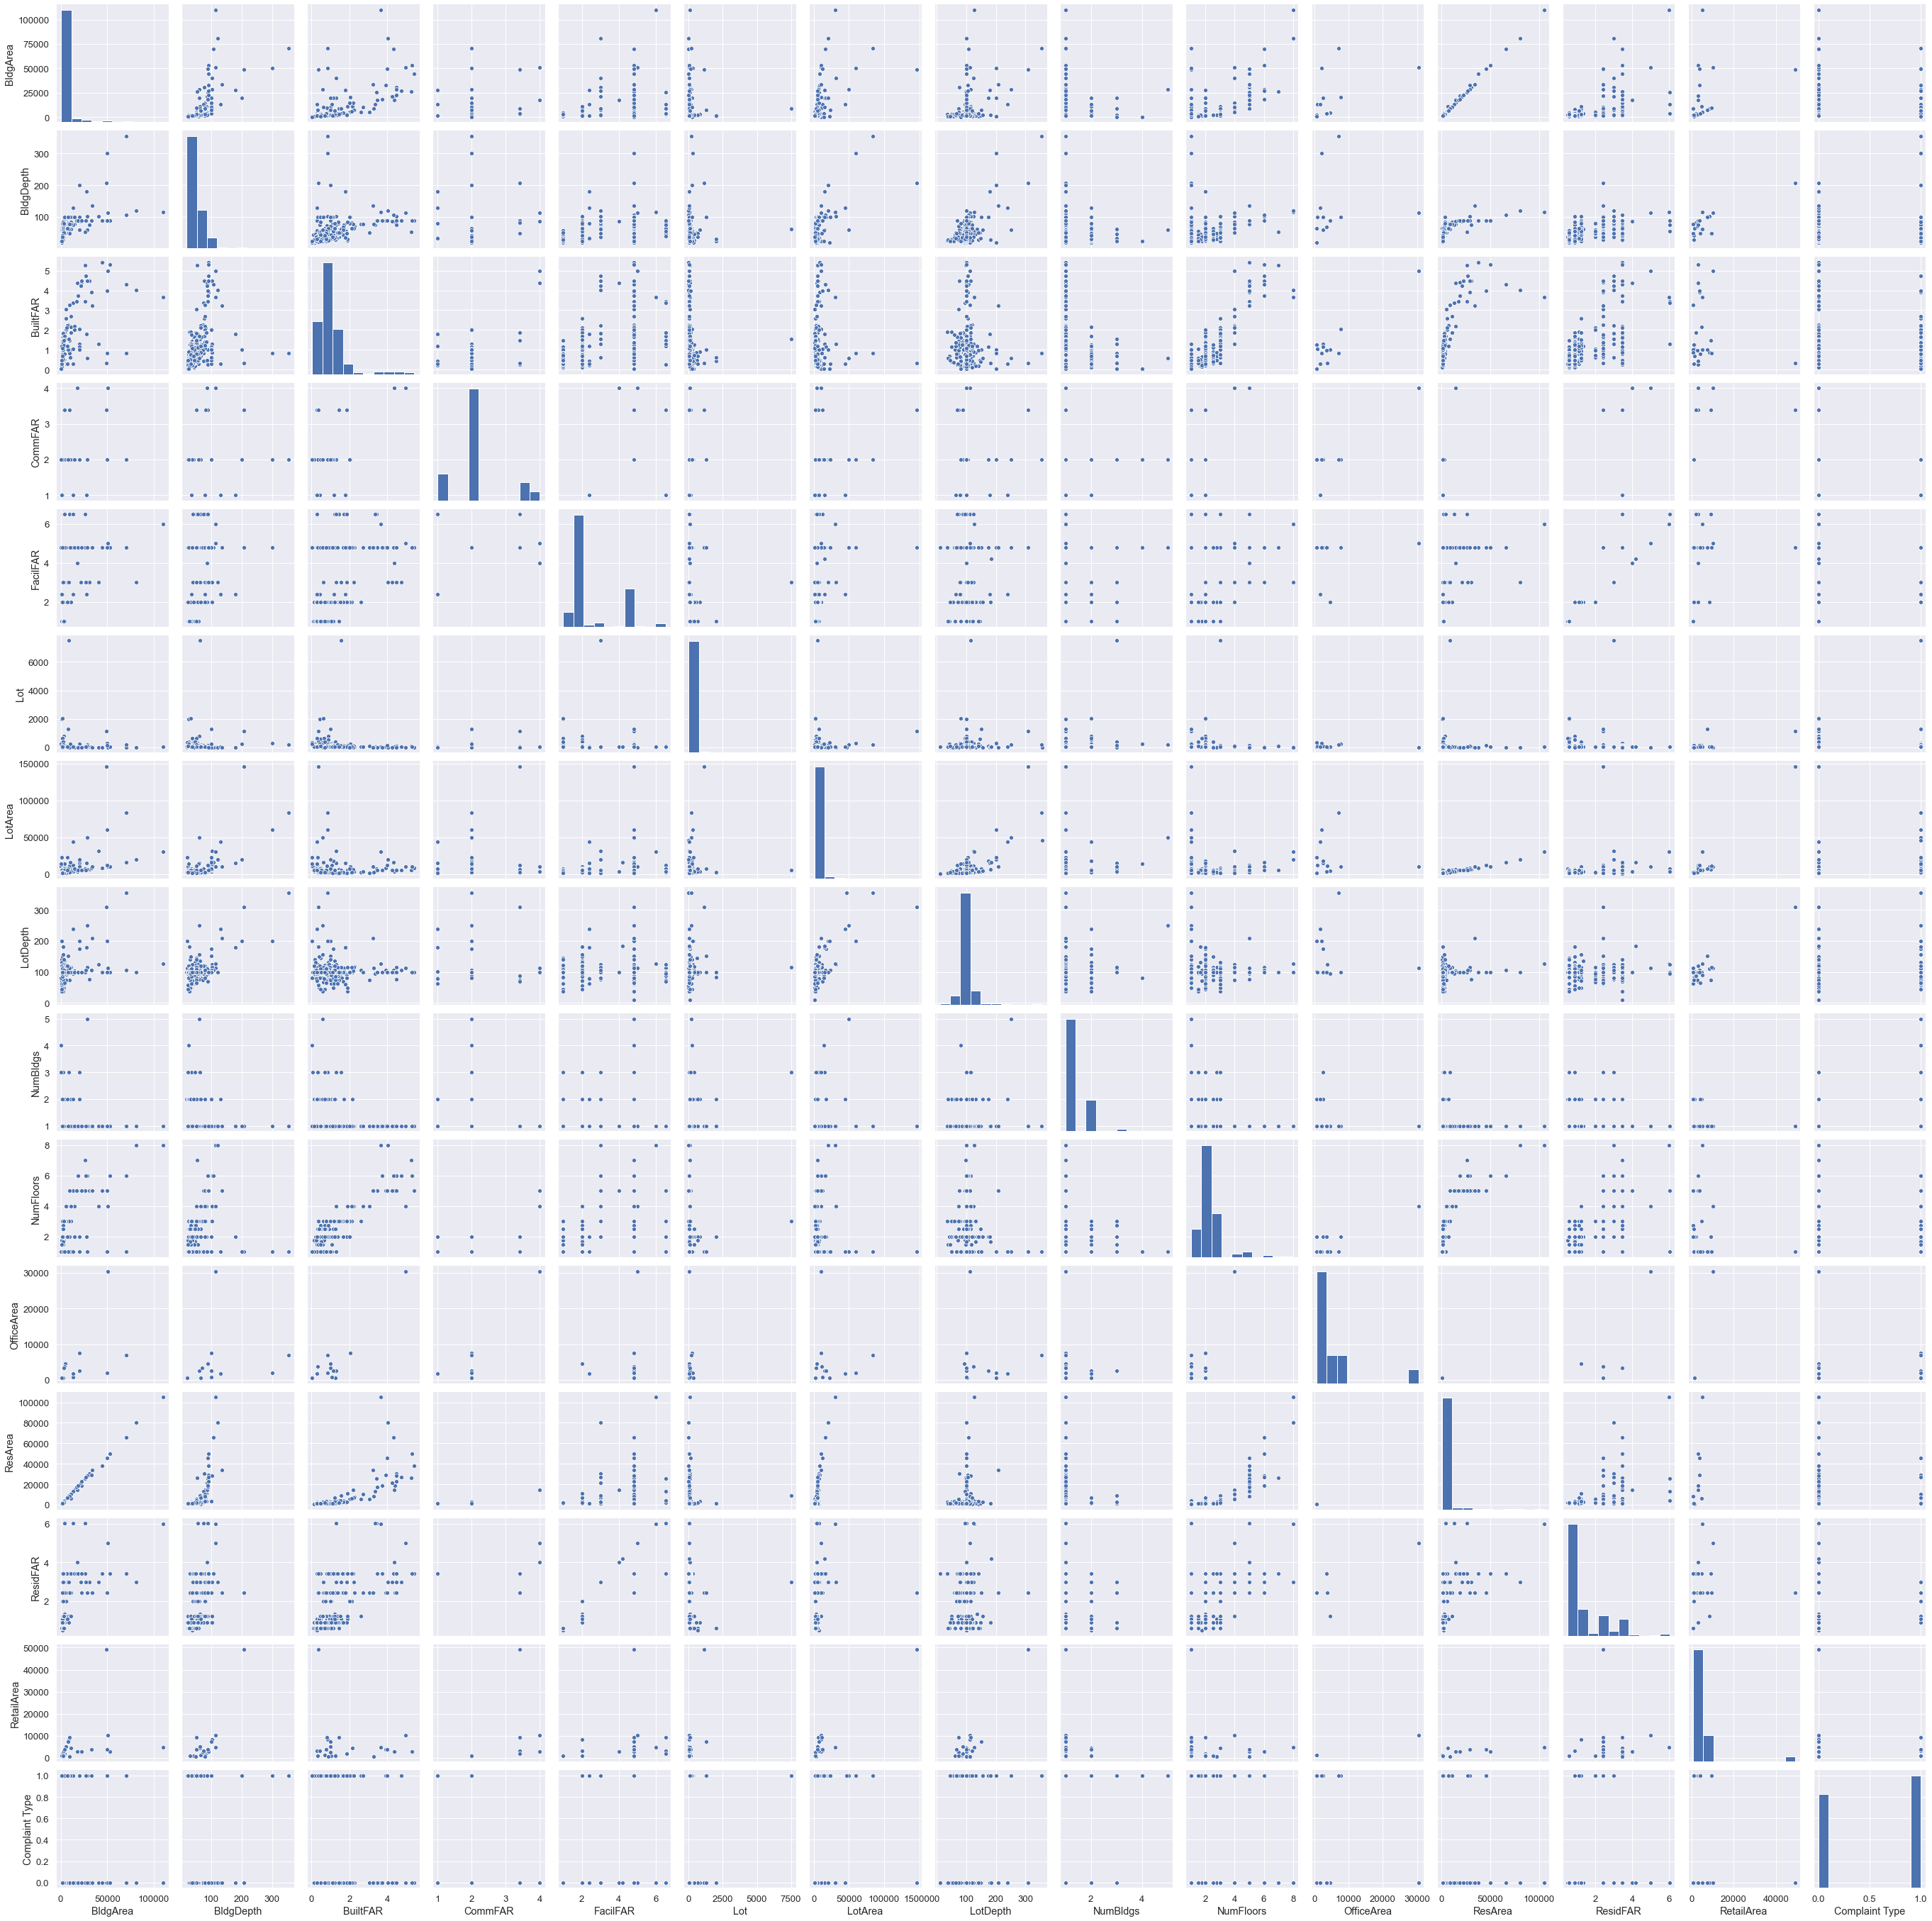

In [31]:
plt.figure(figsize=(20,20))
plt.suptitle('Pairplots of features', x=0.5, y=1.02, ha='center', fontsize='large')
sns.pairplot(df2.sample(500))
plt.show()

### Bivariate Data Exploration

In [32]:
# sns.jointplot(x='', y='',data=df, kind='scatter')

# sns.jointplot(x='', y='',data=df, kind='scatter')

# sns.jointplot(x='', y='',data=df, kind='scatter')

# sns.jointplot(x='', y='',data=df, kind='scatter')

# sns.jointplot(x='', y='',data=df, kind='kde')

# sns.jointplot(x='', y='',data=df, kind='kde')

# sns.jointplot(x='', y='',data=df, kind='hex')

# sns.jointplot(x='', y='',data=df, kind='hex')

# sns.jointplot(x='', y='',data=df, kind='reg')

# sns.jointplot(x='', y='',data=df, kind='reg')


# plt.show()

In [33]:
# g = sns.FacetGrid(data=df, col="column_name", height=3, aspect=1)
# g.map(plt.scatter, "numeric", "numeric")
# g.add_legend()
# plt.show()

### Correlation

In [34]:
df2.corr()

,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,Complaint Type
BldgArea,1.000000,0.498786,0.303056,0.141263,0.181863,0.019192,0.831473,0.400445,0.565534,0.422872,0.985647,0.998839,0.189175,0.396724,-0.076117
BldgDepth,0.498786,1.000000,0.443931,0.159644,0.433559,0.031634,0.326971,0.447882,0.166958,0.249319,0.478795,0.553125,0.447172,0.496558,-0.073268
BuiltFAR,0.303056,0.443931,1.000000,0.359364,0.504266,-0.012253,-0.004742,-0.057475,-0.109094,0.746783,-0.063623,0.514763,0.556321,-0.122960,-0.204772
CommFAR,0.141263,0.159644,0.359364,1.000000,0.711220,0.095913,0.009335,-0.014662,-0.061948,0.265561,0.321103,0.415931,0.798385,0.015992,-0.105002
FacilFAR,0.181863,0.433559,0.504266,0.711220,1.000000,-0.022380,0.015856,0.057650,-0.047591,0.319111,-0.120221,0.286218,0.905523,0.016205,-0.220572
Lot,0.019192,0.031634,-0.012253,0.095913,-0.022380,1.000000,0.014532,0.056080,0.010307,0.018647,-0.049682,0.030782,-0.014742,0.163550,-0.077588
LotArea,0.831473,0.326971,-0.004742,0.009335,0.015856,0.014532,1.000000,0.296483,0.600832,0.030084,0.986137,0.758300,0.011090,0.811834,-0.014069
LotDepth,0.400445,0.447882,-0.057475,-0.014662,0.057650,0.056080,0.296483,1.000000,0.213797,0.109769,0.247425,0.469403,0.021321,0.577409,0.015070
NumBldgs,0.565534,0.166958,-0.109094,-0.061948,-0.047591,0.010307,0.600832,0.213797,1.000000,-0.001275,0.944051,0.288270,-0.060919,0.164222,0.010476
NumFloors,0.422872,0.249319,0.746783,0.265561,0.319111,0.018647,0.030084,0.109769,-0.001275,1.000000,0.039164,0.742699,0.389227,0.060322,-0.149220


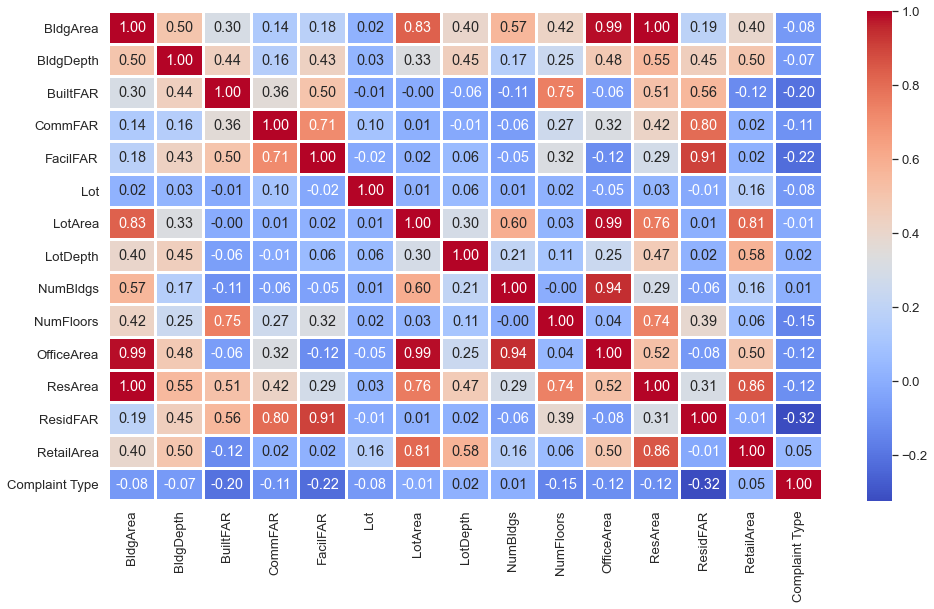

In [35]:
plt.figure(figsize=(16,9))
sns.heatmap(df2.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.show()

### Linear Regression

In [36]:
df2.columns

Index(['BldgArea', 'BldgDepth', 'BuiltFAR', 'CommFAR', 'FacilFAR', 'Lot',
       'LotArea', 'LotDepth', 'NumBldgs', 'NumFloors', 'OfficeArea', 'ResArea',
       'ResidFAR', 'RetailArea', 'Complaint Type'],
      dtype='object')

In [37]:
y = df2['Complaint Type']
x1 = df2['NumBldgs']

In [38]:
x = sm.add_constant(x1)

In [39]:
results = sm.OLS(y,x).fit()

MissingDataError: exog contains inf or nans

In [ ]:
results.summary()